In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Estatísticas de segurança: série histórica anual por município desde 2014 (taxas por 100 mil habitantes)
df_muni_tax_ano = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseMunicipioTaxaAno.csv', sep=';' , encoding='latin1')
df_muni_tax_ano


,fmun_cod,fmun,ano,regiao,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,3300100,Angra dos Reis,2014,Interior,"40,55",0,"0,54","41,09","1,08","42,18",...,"87,6","2,16","510,44","49,75","4,33",0,0,0,"3256,19",3
1,3300100,Angra dos Reis,2015,Interior,"48,86",0,0,"48,86","6,9","55,77",...,"77,55","3,19","477,49","39,3","1,59",0,0,0,"3037,56",3
2,3300100,Angra dos Reis,2016,Interior,"44,39","0,52","0,52","45,43","3,66","49,09",...,"65,27","7,31","341,51","40,21","4,7",0,0,0,"2858,43",3
3,3300100,Angra dos Reis,2017,Interior,"44,7",0,0,"44,7","13,36","58,06",...,"101,22","2,57","230,71","27,75","3,08","0,51",0,0,"2321,97",3
4,3300100,Angra dos Reis,2018,Interior,"65,87",0,"0,5","66,36","25,45","91,81",...,"84,33","6,49","221,05","25,95","5,99","0,5","2,22",0,"2292,83",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,3306305,Volta Redonda,2016,Interior,"24,65",0,0,"24,65","1,52","26,17",...,"87,23","6,83","348,56","17,07","4,93",0,0,0,"3021,33",3
640,3306305,Volta Redonda,2017,Interior,"23,76",0,"0,38","24,13","0,75","24,89",...,"87,86","5,66","243,21","14,33","3,02",0,0,0,"2459,27",3
641,3306305,Volta Redonda,2018,Interior,"26,47","0,37","0,74","27,57","2,94","30,51",...,"85,29","1,84","303,68","13,97","1,84",0,0,0,"2638,62",3
642,3306305,Volta Redonda,2019,Interior,"32,6","0,37",0,"32,97","3,3","36,26",...,"91,94","2,2","318,67","34,8","1,1","0,37","2,26",0,"2974,96",3


In [3]:
indicadores_mulher = ['estupro', 'ameaca', 'lesao_corp_dolosa', 'hom_doloso']
mun_deam = ['Teresópolis', 'Angra dos Reis', 'Belford Roxo', 'Petrópolis', 'Itaboraí']
df_mun_mulher = df_muni_tax_ano[['ano', 'fmun','regiao', 'estupro', 'ameaca', 'lesao_corp_dolosa', 'hom_doloso']]
df_mun_deam = df_mun_mulher[df_mun_mulher['fmun'].isin(mun_deam)]
df_mun_deam = df_mun_deam.sort_values(by= 'ano')
df_mun_deam

,ano,fmun,regiao,estupro,ameaca,lesao_corp_dolosa,hom_doloso
0,2014,Angra dos Reis,Interior,"49,75","510,44","466,1","40,55"
56,2014,Belford Roxo,Baixada Fluminense,"34,84","366,09","429,09","48,4"
196,2014,Itaboraí,Interior,"45,78","588,99","490,83","35,66"
378,2014,Petrópolis,Interior,"26,17","425,81","496,62","5,03"
595,2014,Teresópolis,Interior,"32,07","468,85","513,17",7
197,2015,Itaboraí,Interior,"44,54","458,94","431,43","23,14"
57,2015,Belford Roxo,Baixada Fluminense,"28,68","282,25","329,23","35,96"
1,2015,Angra dos Reis,Interior,"44,08","477,49","458,37","48,86"
379,2015,Petrópolis,Interior,"29,18",430,"455,49","6,71"
596,2015,Teresópolis,Interior,"38,71","608,46","550,1","6,93"


In [4]:
homi_dol = df_mun_deam.groupby(['ano', 'fmun'])['hom_doloso'].sum().reset_index()
estupro = df_mun_deam.groupby(['ano', 'fmun'])['estupro'].sum().reset_index()
ameaca = df_mun_deam.groupby(['ano', 'fmun'])['ameaca'].sum().reset_index()

In [5]:
df_feminicidio = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseFeminicidioEvolucaoMensalCisp.csv', sep=';' , encoding='latin1')
df_feminicidio_deam = df_feminicidio[df_feminicidio['Município'].isin(mun_deam)]
df_feminicidio_deam = df_feminicidio_deam.sort_values(by= 'Ano')
df_feminicidio_deam

,CISP,AISP,RISP,Município,Mês,Ano,Feminicídio,Tentativa de feminicídio,Fase
15204,105,26,7,Petrópolis,11,2016,0,0,3
15205,106,26,7,Petrópolis,11,2016,0,0,3
15209,110,30,7,Teresópolis,11,2016,0,0,3
15251,166,33,5,Angra dos Reis,11,2016,0,0,3
15025,54,39,3,Belford Roxo,12,2016,0,0,3
...,...,...,...,...,...,...,...,...,...
678,106,26,7,Petrópolis,2,2025,0,0,3
487,54,39,3,Belford Roxo,3,2025,0,1,3
438,166,33,5,Angra dos Reis,4,2025,0,0,2
390,110,30,7,Teresópolis,4,2025,0,0,2


In [6]:
feminicidio = df_feminicidio_deam.groupby(['Ano', 'Município'])['Feminicídio'].sum().reset_index()
feminicidio

,Ano,Município,Feminicídio
0,2016,Angra dos Reis,0
1,2016,Belford Roxo,0
2,2016,Itaboraí,0
3,2016,Petrópolis,0
4,2016,Teresópolis,0
5,2017,Angra dos Reis,1
6,2017,Belford Roxo,2
7,2017,Itaboraí,1
8,2017,Petrópolis,1
9,2017,Teresópolis,1


In [7]:
df_comparado = pd.concat([homi_dol, estupro, ameaca, feminicidio])
df_comparado

,ano,fmun,hom_doloso,estupro,ameaca,Ano,Município,Feminicídio
0,2014.0,Angra dos Reis,"40,55",NaN,NaN,NaN,NaN,NaN
1,2014.0,Belford Roxo,"48,4",NaN,NaN,NaN,NaN,NaN
2,2014.0,Itaboraí,"35,66",NaN,NaN,NaN,NaN,NaN
3,2014.0,Petrópolis,"5,03",NaN,NaN,NaN,NaN,NaN
4,2014.0,Teresópolis,7,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
45,NaN,NaN,NaN,NaN,NaN,2025.0,Angra dos Reis,0.0
46,NaN,NaN,NaN,NaN,NaN,2025.0,Belford Roxo,2.0
47,NaN,NaN,NaN,NaN,NaN,2025.0,Itaboraí,1.0
48,NaN,NaN,NaN,NaN,NaN,2025.0,Petrópolis,1.0


In [8]:
# Cria a nova coluna unificando os valores
df_comparado['Ano_Unificado'] = df_comparado['Ano'].fillna(df_comparado['ano'])

# Remove as colunas antigas
df_comparado.drop(columns=['ano', 'Ano'], inplace=True)

# Renomeia a nova coluna para 'Ano'
df_comparado.rename(columns={'Ano_Unificado': 'Ano'}, inplace=True)

# (Opcional) Garante que seja inteiro
df_comparado['Ano'] = df_comparado['Ano'].astype(int)

df_comparado


,fmun,hom_doloso,estupro,ameaca,Município,Feminicídio,Ano
0,Angra dos Reis,"40,55",NaN,NaN,NaN,NaN,2014
1,Belford Roxo,"48,4",NaN,NaN,NaN,NaN,2014
2,Itaboraí,"35,66",NaN,NaN,NaN,NaN,2014
3,Petrópolis,"5,03",NaN,NaN,NaN,NaN,2014
4,Teresópolis,7,NaN,NaN,NaN,NaN,2014
...,...,...,...,...,...,...,...
45,NaN,NaN,NaN,NaN,Angra dos Reis,0.0,2025
46,NaN,NaN,NaN,NaN,Belford Roxo,2.0,2025
47,NaN,NaN,NaN,NaN,Itaboraí,1.0,2025
48,NaN,NaN,NaN,NaN,Petrópolis,1.0,2025


In [9]:
# Cria nova coluna unificada
df_comparado['Municipio'] = df_comparado['Município'].fillna(df_comparado['fmun'])

# Remove as antigas
df_comparado.drop(columns=['fmun', 'Município'], inplace=True)

df_comparado

,hom_doloso,estupro,ameaca,Feminicídio,Ano,Municipio
0,"40,55",NaN,NaN,NaN,2014,Angra dos Reis
1,"48,4",NaN,NaN,NaN,2014,Belford Roxo
2,"35,66",NaN,NaN,NaN,2014,Itaboraí
3,"5,03",NaN,NaN,NaN,2014,Petrópolis
4,7,NaN,NaN,NaN,2014,Teresópolis
...,...,...,...,...,...,...
45,NaN,NaN,NaN,0.0,2025,Angra dos Reis
46,NaN,NaN,NaN,2.0,2025,Belford Roxo
47,NaN,NaN,NaN,1.0,2025,Itaboraí
48,NaN,NaN,NaN,1.0,2025,Petrópolis


In [10]:
anos_deam = {
    'Teresópolis': 2018,
    'Angra dos Reis': 2017,
    'Belford Roxo': 2019,
    'Petrópolis': 2016,
    'Itaboraí': 2018
}

# Supondo que anos_deam já esteja definido:
df_comparado['Periodo'] = df_comparado.apply(
    lambda row: 'Antes da DEAM' if row['Ano'] < anos_deam[row['Municipio']] else 'Depois da DEAM',
    axis=1
)


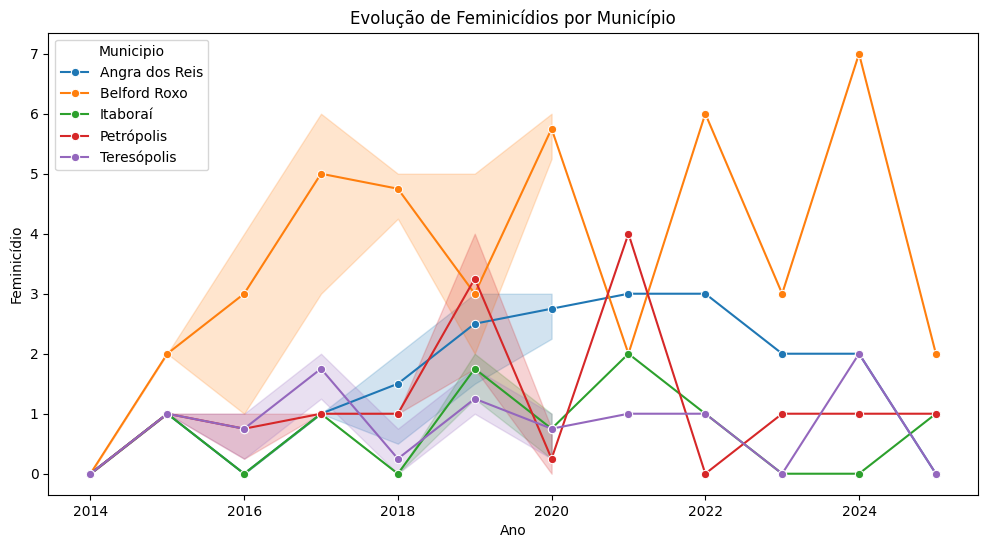

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_comparado, x='Ano', y='Feminicídio', hue='Municipio', marker='o')
plt.title('Evolução de Feminicídios por Município')
plt.show()

In [12]:
comparacao = df_comparado.groupby(['Municipio', 'Periodo'])['Feminicídio'].mean().round(2).unstack()
print(comparacao)


Periodo         Antes da DEAM  Depois da DEAM
Municipio                                    
Angra dos Reis            0.0            1.56
Belford Roxo              2.0            4.43
Itaboraí                  0.5            0.62
Petrópolis                NaN            1.10
Teresópolis               0.5            0.88


C:\Users\cmjfe\AppData\Local\Temp\ipykernel_7092\2995276509.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_comparado, x='Municipio', y='Feminicídio', hue='Periodo', estimator='mean', ci=None)


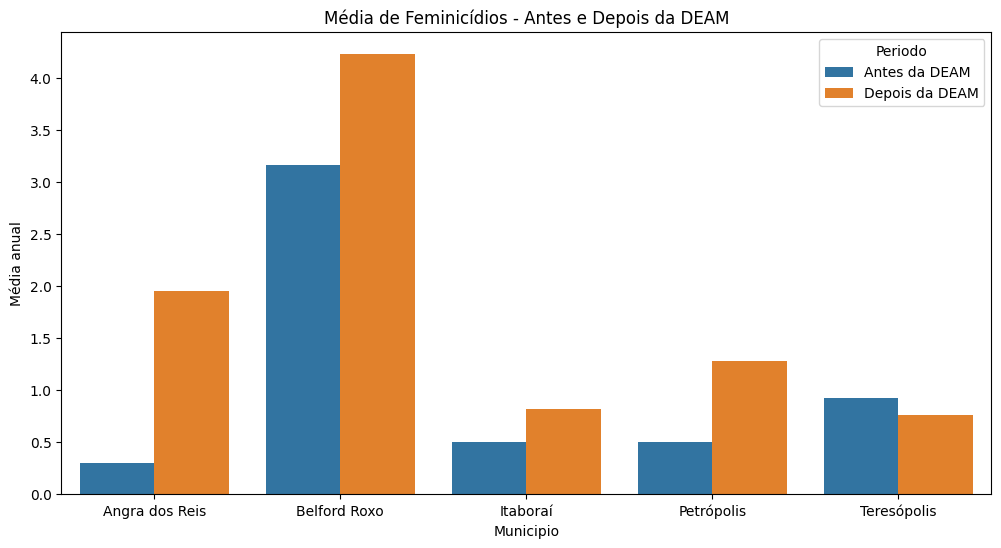

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_comparado, x='Municipio', y='Feminicídio', hue='Periodo', estimator='mean', ci=None)
plt.title('Média de Feminicídios - Antes e Depois da DEAM')
plt.ylabel('Média anual')
plt.show()